# This notebook has the function of my volcano plots that can customize highlights of top differential genes or other gene of interests

In [2]:
import pandas as pd
import numpy as np

In [3]:
import sys
sys.path.append('/home/lucy/')

In [4]:
import zc_function as zc

In [5]:
from matplotlib import pyplot as plt

In [6]:
import seaborn as sn
import sys

In [7]:
from adjustText import adjust_text

## functions 

In [8]:
def text_top_significant( up, down,lfc_col, pval_col, num_label_top_up,num_label_top_down, annotation_text_col = 'Feature_gene_name' ):
    #get top DGs to be labelled with their name
    up.sort_values( by = pval_col,  ascending = True, inplace=True)
    down.sort_values( by = pval_col, ascending = True, inplace=True)
    
    top_up = up.iloc[0:num_label_top_up, : ] 
    top_down = down.iloc[0:num_label_top_down, : ]
    
    top_up.set_index(annotation_text_col, inplace= True)
    top_down.set_index(annotation_text_col, inplace= True)

    texts=[]
    for i,r in top_up.iterrows():
        texts.append(plt.text(x=r[lfc_col],y=-np.log10(r[pval_col]),s=i))
    for i,r in top_down.iterrows():
        texts.append(plt.text(x=r[lfc_col],y=-np.log10(r[pval_col]),s=i))

    return texts
    

In [9]:
def text_selected_genes( df, selected_genes, lfc_col, pval_col, annotation_text_col = 'Feature_gene_name'):
    
    selected_df = df.set_index(annotation_text_col, inplace= False)
    selected_df = selected_df[ np.isin( selected_df.index, selected_genes)]
    
    texts=[]
    for i,r in selected_df.iterrows():
        texts.append(plt.text(x=r[lfc_col],y=-np.log10(r[pval_col]),s=i))

    return texts

In [10]:

def dge_vocano_plot( df, lfc_col = 'log2FoldChange', pval_col = 'padj', title = 'GNAS: DOX vs CTRL', 
                    up_lfc_thresh = 2, down_lfc_thresh = -2, pval_thresh = 0.05, 
                    up_legend_lab = 'DOX UP', down_legend_lab = 'CTRL UP', ns_legend_lab = 'NS',
                    num_label_top_up = 10, num_label_top_down = 10 , 
                    text_function = None, text_function_arg_dict = None, 
                    selected_genes = None, annotation_text_col = 'Feature_gene_name', 
                    show_fig = True, return_ax = False , ):
    """This is the main vocalno plot function that highlights the significantly up and down regulated genes. 
    This function can also integrate text annotation of genes, 
    either selected genes or top significant genes specifified by the text annotation function passed in  """

    f,ax = plt.subplots(figsize=(8, 6))
    #plt.figure(figsize=(8, 6))
    
    ax.scatter(x=df[lfc_col],y=df[pval_col].apply(lambda x:-np.log10(x)),s=1,label=ns_legend_lab, color = 'silver')
    
    # highlight down- or up- regulated genes
    down = df[(df[lfc_col]<=down_lfc_thresh)&(df[pval_col]<=pval_thresh)]
    up = df[(df[lfc_col]>=up_lfc_thresh)&(df[pval_col]<=pval_thresh)]
    
    ax.scatter(x=down[lfc_col],y=down[pval_col].apply(lambda x:-np.log10(x)),s=2,label=down_legend_lab,color="royalblue")
    ax.scatter(x=up[lfc_col],y=up[pval_col].apply(lambda x:-np.log10(x)),s=2
               ,label= up_legend_lab,color="salmon")
    
    

    if( text_function):
        #texts = text_function( up, down,lfc_col, pval_col,num_label_top_up,num_label_top_down  )
        text_function_arg_dict = dict(  up = up,  down=down, lfc_col=lfc_col, pval_col=pval_col,
            num_label_top_up=num_label_top_up ,num_label_top_down=num_label_top_down, annotation_text_col = annotation_text_col ) 
        # text_function_arg_dict = dict( df=df, selected_genes = selected_genes, lfc_col=lfc_col, pval_col=pval_col)
        
        
        texts = text_function( **text_function_arg_dict)
        adjust_text(texts,arrowprops=dict(arrowstyle="-", color='black', lw=0.5), force_static = (0.2, 0.4 ), ax = ax)
    
    ax.set_title( title)
    ax.set_xlabel("logFC")
    ax.set_ylabel("-log10( p_adj)")
    ax.axvline(down_lfc_thresh,color="grey",linestyle="--")
    ax.axvline(up_lfc_thresh,color="grey",linestyle="--")
    ax.axhline(-np.log10(0.05),color="grey",linestyle="--")
    ax.legend(loc = 'right', bbox_to_anchor=(1.2, 0.5), fontsize = 'small')

    if( show_fig):
        plt.show()
        
    if( return_ax ):
        return f, ax
    

In [12]:

def dge_vocano_color_selected( df, lfc_col = 'log2FoldChange', pval_col = 'padj', title = 'GNAS: DOX vs CTRL', 
                    up_lfc_thresh = 2, down_lfc_thresh = -2, pval_thresh = 0.05, 
                    selected_legend_lab = 'selected genes',
                    selected_genes = None, selected_genes_text_bool = False, selected_text_genes = None,
                    annotation_text_col = 'Feature_gene_name',
                    show_fig = True, return_ax = False , ):
    """This function makes the volcano plot but only coloring the dots for selected genes instead of significantly up or down regulated genes
    @param selected_genes:  a list of gene names that are going to be colored
    @param selected_genes_text_bool: boolean variable to decide if want to add text annotation of some selected genes to the plot
    @param selected_text_genes: a list of gene names that are going to be annotated as text if selected_genes_text_bool set True"""

    f,ax = plt.subplots(figsize=(8, 6))
    #plt.figure(figsize=(8, 6))

    # scatter all data points
    ax.scatter(x=df[lfc_col],y=df[pval_col].apply(lambda x:-np.log10(x)),s=0.7,label='other genes', color = 'silver',  )

    # select data points for color
    selected_df = df[np.isin( df[annotation_text_col], selected_genes)] 

    # plotting the colors
    ax.scatter(x=selected_df[lfc_col],y=selected_df[pval_col].apply(lambda x:-np.log10(x)),s=1.5,label=selected_legend_lab,color="orangered")

    # add text
    if( selected_genes_text_bool):
        text_function_arg_dict = dict( df=df, selected_genes = selected_text_genes, lfc_col=lfc_col, pval_col=pval_col, annotation_text_col = annotation_text_col)
        texts = text_selected_genes( **text_function_arg_dict)
        adjust_text(texts,arrowprops=dict(arrowstyle="-", color='black', lw=0.5), force_static = (0.2, 0.4 ), ax = ax)
    
    
    ax.set_title( title)
    ax.set_xlabel("logFC")
    ax.set_ylabel("-log10( p_adj)")
    ax.axvline( down_lfc_thresh, color="grey",linestyle="--")
    ax.axvline( up_lfc_thresh, color="grey",linestyle="--")
    ax.axhline(-np.log10(0.05),color="grey",linestyle="--")
    ax.legend(loc = 'right', bbox_to_anchor=(1.2, 0.5), fontsize = 'small')

    if( show_fig):
        plt.show()
        
    if( return_ax ):
        return f, ax
    

## example

In [13]:
mss_diff = pd.read_csv("/home/lucy/Dropbox/methylation_run/methylkit_output/mss_diff_annotated_df_processed.csv", header = 0, index_col =  0 )
mss_diff.head() # a DGE df that has adj-pval and fold change or corresponding columns

,chr,start,end,strand,pvalue,qvalue,meth.diff,refseq,gene_symbol
206,chr1,729567,729567,+,0.163672,0.343397,-7.466509,XM_024449992.2,OR4F16
369,chr1,825919,825919,-,0.692823,0.710663,-1.692770,XR_001737607.3,LINC01128
1007,chr1,935239,935239,+,0.650790,0.690500,1.982932,XM_006710600.4,KLHL17
1482,chr1,963902,963902,+,0.928152,0.800985,-0.160875,XM_017002479.2,PLEKHN1
1807,chr1,983291,983291,-,0.000436,0.004180,-17.500000,XM_047426314.1,HES4


### color top differential genes 

/tmp/ipykernel_2988537/1284565510.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  up.sort_values( by = pval_col,  ascending = True, inplace=True)
/tmp/ipykernel_2988537/1284565510.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  down.sort_values( by = pval_col, ascending = True, inplace=True)


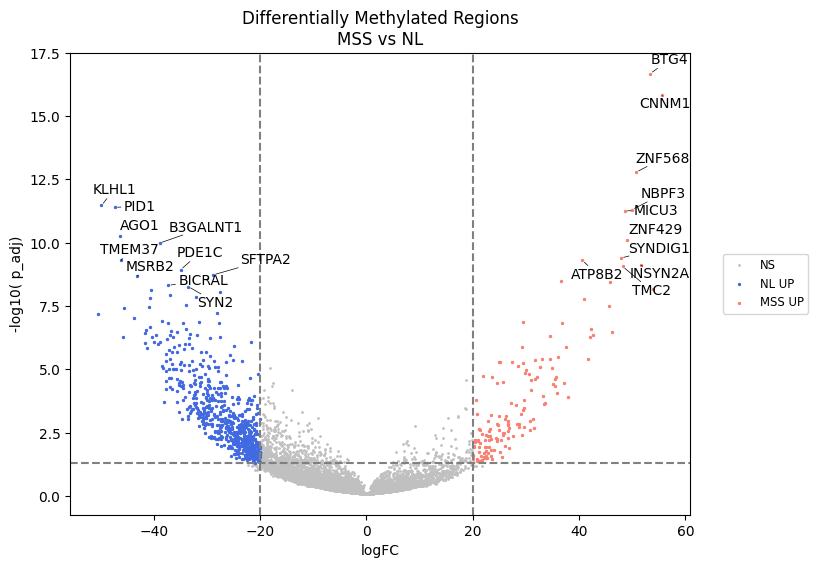

In [14]:

f1, a1 = dge_vocano_plot( df = mss_diff, lfc_col = 'meth.diff', pval_col = 'qvalue', title = 'Differentially Methylated Regions\nMSS vs NL', 
                    up_lfc_thresh = 20, down_lfc_thresh = -20, pval_thresh = 0.05, 
                    up_legend_lab = 'MSS UP', down_legend_lab = 'NL UP', ns_legend_lab = 'NS',
                    num_label_top_up = 10, num_label_top_down = 10, return_ax=True, show_fig = False, 
                    text_function = text_top_significant, annotation_text_col='gene_symbol' )

# uncomment the below line to save img
#plt.savefig( './rm_outlier_pdf/volcano_KrasGNAS_all_genes.pdf', bbox_inches = 'tight' )

### color gene of interest

In [15]:
cimp_5m = ['APBA1', 'APBA2' ,'MINT31', 'CDK2' , 'MLH1' ]  
# ABPA1 and 2 were MINT 1 and 2
# CDK2A changed to CDK2
cimp_8m = ['CACNA1G' , 'CDKN2A' , 'RBP5',  'MLH1' , 'NEUROG1' ,'IGF2', 'RUNX3' ,'SOCS1' ] 
# CRABP1 changed to RBP5, 
cimp_other = ['HIC1' ,'IGFBP3' , 'WRN' ] 
cimp_all = cimp_5m + cimp_8m + cimp_other

In [18]:
mss_cimp = mss_diff[ np.isin( mss_diff['gene_symbol'] , cimp_all ) ]
mss_cimp.head(2)

,chr,start,end,strand,pvalue,qvalue,meth.diff,refseq,gene_symbol
77419,chr1,24911800,24911800,-,0.430368,0.564807,-3.861789,XM_011542351.2,RUNX3
542158,chr12,7057855,7057855,-,0.190130,0.375337,-9.447800,XR_007063132.1,RBP5


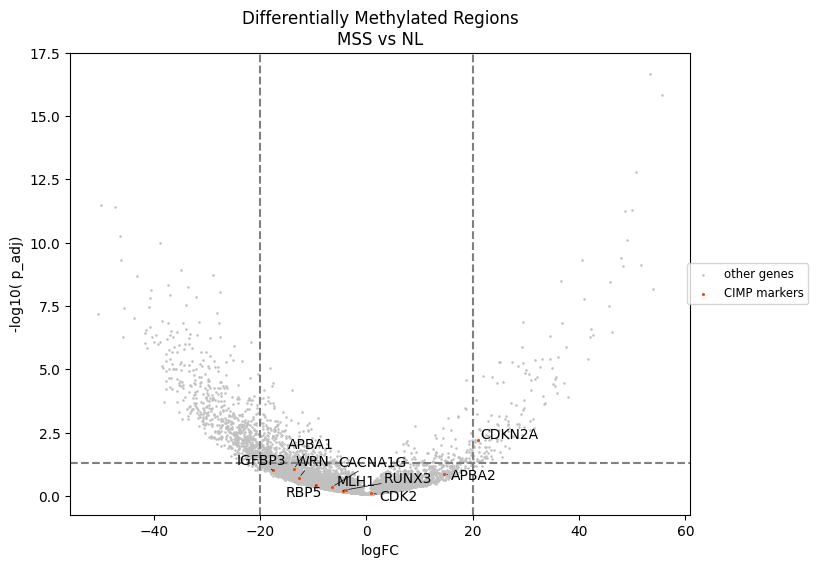

In [20]:
dge_vocano_color_selected( df=mss_diff, lfc_col = 'meth.diff', pval_col = 'qvalue', title = 'Differentially Methylated Regions\nMSS vs NL',  
                    up_lfc_thresh = 20, down_lfc_thresh = -20, pval_thresh = 0.05, 
                    selected_legend_lab = 'CIMP markers',
                    selected_genes = mss_cimp['gene_symbol'], selected_genes_text_bool = True, selected_text_genes = mss_cimp['gene_symbol'],
                    annotation_text_col = 'gene_symbol',
                    show_fig = True, return_ax = False , )